# Return of Investments for online marketing

## Try me
 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ffraile/operations-research-notebooks/blob/main/docs/source/Simulation/Solved/Return%20of%20search%20engine%20investments.ipynb)[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ffraile/operations-research-notebooks/main?labpath=docs%2Fsource%2FSimulation%2FSolved%2FReturn%20of%20search%20engine%20investments.ipynb)

The following metrics and indicators determine the expenditures and return of investments of marketing investments in paid inclusion (including your company's web page in search results) for your company:

- **S (Total Search results in period):** Total number of times the keywords are used in searches in the planning period.
- **CPM (Cost per 1000 impressions):** Cost of the search engine per every 1000 impressions, every time your website appears in a search result
- **CPC (Cost per click):** Cost per every click
- **CTR (Click Through Rate):** rate between the number of clicks and number of impressions
- **CVR (Conversion Rate):** rate between the number of visitors and the number of users

With this, the number of visitors (V) and the number of users (U) can be calculated as:

$U = V * CVR = S * CTR * CVR$

The total costs ($C_t$) of the search engine investmets are:

$C_t = CPC*V + CPM/1000*S$


The **ARPU (Average revenue per user in planning period)** is the average revenue per user, or the total revenue in the planning period (R), divided by the number of users:

$ARPU = R/U$

The Return of Investments for online marketing is calculated as:

$ROI = \frac{R - C_t}{C_t}$

After some research, you have found that the different metrics can be modeled as normal distributions with the following parameters:

| Metric | Mean | Standard Deviation |
|--------|------|--------------------|
|Search results | 600000 | 100000 |
| CTR | 0.05 | 0.01 |
| CVR | 0.5 | 0.1 |

These are the search engine fees for your keywords:
- CPM = 0,3€
- CPC = 0,75€

You estimate your ARPU in 5€

**a.** Calculate the total costs, the total Return of Investments and the average cost per acquisition using Montecarlo Simulation


Ok, let´s first import the libraries we will need:

In [1]:
import pandas as pd
import numpy as np

Ok, now we can start with the simulation. First, we will define the number of simulations we want to run. We will use 100000 simulations, but you can change this number to see how the results change. Once, we define the number of simulations, we will also define the properties of the random variables we want to simulate with Montecarlo (mean and standard deviation). We will use the numpy library to generate the random variables. Finally, in this basic implementation, we will define a for loop to run the simulation and store the results in a dataframe. We will also calculate the ROI for each simulation and store it in the dataframe. Finally, We will use the describe function to get the statistics of the results.

In [ ]:
# Number of simulations
num_simulations = 100000

# Parameters of the revenue model
#Data Search Results and search engines costs
#Data Search Results and search engines costs
search_results_avg = 600000
search_results_std = 100000

ctr_mean = 0.05
ctr_std = 0.01

cvr_mean = 0.5
cvr_std = 0.1

# Costs and unitary profit
CPM = 0.3
CPC = 0.75

ARPU = 5

# We initialize a numpy array with the number of simulations and the number of variables we want to simulate
results = np.zeros((num_simulations, 8))

# We run the simulation
for i in range(num_simulations):
    # First we calculate the total number of impacts or searches
    total_impacts = np.random.normal(search_results_avg,search_results_std)

    # Then we calculate the total number of visitors using the Click Through Rate (CTR)
    CTR = np.random.normal(ctr_mean, ctr_std)
    total_visitors = total_impacts * CTR

    # Then we calculate the total number of customers using the Conversion Rate (CVR)
    CVR = np.random.normal(cvr_mean, cvr_std)
    total_customers = total_visitors * CVR

    # Finally, we calculate the total cost and the total revenues, using the costs and the ARPU
    total_cost = CPC*total_visitors + CPM*total_impacts/1000
    total_revenues = total_customers * ARPU
    ROI = (total_revenues - total_cost)/total_cost

    # We store the results in the numpy array, in row i
    results[i,:] = [total_impacts, CTR, total_visitors, CVR, total_customers, total_cost, total_revenues, ROI]

# We create a dataframe with the results
df_results = pd.DataFrame(results, columns = ['Total impacts', 'CTR', 'Total visitors', 'CVR', 'Total customers', 'Total cost', 'Total revenues', 'ROI'])
results.describe()

This code works and is easy to interpret, but it does not leverage one of the most outstanding features of Numpy, working with vectors and matrices. Let´s see how we can improve the code using vectors and matrices, avoiding the for loop:

In [2]:
num_simulations = 100000

#Data Search Results and search engines costs
search_results_avg = 600000
search_results_std = 100000

ctr_mean = 0.05
ctr_std = 0.01

cvr_mean = 0.5
cvr_std = 0.1

# Costs and unitary profit
CPM = 0.3
CPC = 0.75

ARPU = 5


# Total number of impacts or searches, each row represents a simulation
total_impacts = np.random.normal(search_results_avg,search_results_std, num_simulations)

# Click Through Rate, each row represents a simulation
CTR = np.random.normal(ctr_mean, ctr_std, num_simulations)

# Total clicks or visitors
total_visitors = total_impacts * CTR

# Conversion rate
CVR = np.random.normal(cvr_mean, cvr_std, num_simulations)

#Total customers or users
total_customers = total_visitors * CVR

#Total search engine costs
total_cost = CPC*total_visitors + CPM*total_impacts/1000

#Total revenues estimated from ARPU
total_revenues = total_customers * ARPU

#ROI (total revenues - total costs)/total cost

ROI = (total_revenues - total_cost)/total_cost


results_df = pd.DataFrame({'impacts':total_impacts, 'CTR':CTR, 'Visitors':total_visitors, 'CVR':CVR, 'Customers':total_customers, 'Revenues':total_revenues, 'Cost':total_cost, 'ROI':ROI})

#Now we can see the statistics using the describe function:
results_df.describe()


,impacts,CTR,Visitors,CVR,Customers,Revenues,Cost,ROI
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.999030e+05,0.050052,30031.266831,0.499396,14997.328542,74986.642710,22703.421018,2.301716
std,1.001245e+05,0.010003,7901.093998,0.099647,5015.323090,25076.615449,5945.011469,0.658838
min,1.627489e+05,0.006749,3111.804727,0.095343,1425.791553,7128.957767,2472.171271,-0.369106
25%,5.327494e+05,0.043324,24461.139430,0.432389,11421.034780,57105.173899,18513.188951,1.858309
50%,5.997867e+05,0.050051,29532.234129,0.499373,14445.367567,72226.837833,22325.493179,2.301226
75%,6.674925e+05,0.056801,35082.456403,0.566536,18009.074903,90045.374513,26502.929706,2.745805
max,1.045158e+06,0.092695,73104.943275,0.958135,47847.191767,239235.958836,55099.856282,5.337203


Note that the only difference is that now we have used the numpy library to generate bi-dimensional matrices with the random variables, and then just algebraic operations to calculate and store the results. This is much more efficient than using a for loop.

Ok, now we can answer the questions just use the function hist() of the dataframe to plot the histogram:

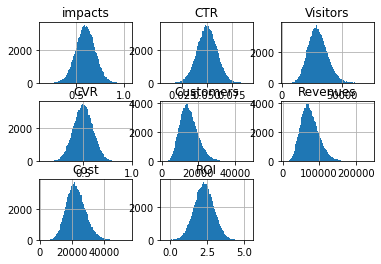

In [3]:
#Check if our distribution is normaly distributed

hist = results_df.hist(bins=100)

Now, to calculate the confidence interval of the ROI, we can use the standard distribution, as we have a large number of simulations. We can use the scipy library to get the confidence interval, using the function norm.ppf() to get the quantiles of the standard distribution. We can also use the describe function to get the statistics of the results:

In [4]:
import scipy.stats as st

In [5]:
# Get the confidence interval of the ROI using the standard distribution
interval = (st.norm.ppf(0.025, loc= np.mean(ROI), scale=np.std(ROI)), st.norm.ppf(0.975, loc= np.mean(ROI), scale=np.std(ROI)))
print(interval)

(1.010423544564778, 3.593008469189609)


The 95% confidence interval of the ROI will be between these 2 values

Note that the function ```norm.ppf``` takes the quantile as the first argument, and the mean and standard deviation as the second and third arguments. Since we want to get the 95% confidence interval, we use 0.025 and 0.975 as the quantiles. To get the average and standard distribution of the ROI, we use the numpy functions ```mean``` and ```std```, which will return the empirical mean and standard deviation of the data generated during the simulation.


In [6]:
# We can also get the empirical 95% confidence interval of all metrics using describe
results_df.describe(percentiles=[0.025, 0.975])

,impacts,CTR,Visitors,CVR,Customers,Revenues,Cost,ROI
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.999030e+05,0.050052,30031.266831,0.499396,14997.328542,74986.642710,22703.421018,2.301716
std,1.001245e+05,0.010003,7901.093998,0.099647,5015.323090,25076.615449,5945.011469,0.658838
min,1.627489e+05,0.006749,3111.804727,0.095343,1425.791553,7128.957767,2472.171271,-0.369106
2.5%,4.026289e+05,0.030309,15950.632852,0.304002,6727.525477,33637.627384,12107.334547,1.010177
50%,5.997867e+05,0.050051,29532.234129,0.499373,14445.367567,72226.837833,22325.493179,2.301226
97.5%,7.955853e+05,0.069589,46908.820897,0.693940,26258.565698,131292.828488,35404.215418,3.587235
max,1.045158e+06,0.092695,73104.943275,0.958135,47847.191767,239235.958836,55099.856282,5.337203
